# Read and Parse Chainer logs

In [1]:
%matplotlib inline
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data

In [2]:
!ls *.log

V100_series_run.log
chainer_timings_K80_b128e1.log
chainer_timings_k80_b64e1.log
chainer_timings_mouse_b128e1.log
chainer_timings_mouse_b64e1.log
chainer_timings_mouse_b64e1_2.log
chainer_timings_mouse_convert_b128e1.log
chainer_timings_mouse_convert_b32e1.log
chainer_timings_mouse_convert_b64e1.log
chainer_timings_mouse_cuda_b64e1.log
chainer_timings_mouse_update_b64e1.log
cupy_logs064.log
cupy_logs128.log
deterministic-nondeterministic.log
mouse_series_run.log
run_series_cifar_bs-lr_determ_01.log
series_batches_learnrate_mouse.log


## CIFAR100 runs with various batch sizes and learning rates

In [3]:
batch_learn_pattern = re.compile(r"^b\s+(\d+)\s+l\s+([0-9\.]+)")
output_pattern = re.compile(r"^(\d+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)")

In [8]:
with open("run_series_cifar_bs-lr_determ_01.log","r") as f:
    lines = f.readlines()
    batch = 0
    epoch = 0
    run = 0
    loss = 0
    acc = 0
    time = 0
    df = pd.DataFrame(data=None,columns=["batch","learn","loss","acc","time"])
    for line in lines:
        s = line.strip()
        m = batch_learn_pattern.match(s)        
        if m:
            batch = int(m.group(1))
            learn = float(m.group(2))            
            run += 1
            #print batch,learn
        else:
            m = output_pattern.match(s)
            if m:
                epoch = int(m.group(1))
                if epoch == 10:
                    loss = float(m.group(3))
                    acc = float(m.group(5))
                    time = float(m.group(6))
                    #print batch,learn,loss,acc,time
                    df.loc[run] = [batch,learn,loss,acc,time]
#df

In [9]:
loss_df = df[['batch','learn','loss']]
acc_df = df[['batch','learn','acc']]
time_df = df[['batch','learn','time']]
#loss_df

In [10]:
loss_T = loss_df.pivot(index="batch",columns="learn",values="loss")
acc_T = acc_df.pivot(index="batch",columns="learn",values="acc")
time_T = time_df.pivot(index="batch",columns="learn",values="time")
acc_T

learn,0.001,0.005,0.01,0.025,0.05,0.1,0.15
batch,,,,,,,
32.0,0.024361,0.270068,0.281649,0.279553,0.186302,0.047025,0.018870
48.0,0.011065,0.193182,0.270534,0.245116,0.214813,0.139155,0.055722
64.0,0.009853,0.101513,0.187998,0.261246,0.212281,0.173766,0.092556
80.0,0.010000,0.089000,0.174600,0.265000,0.252800,0.202300,0.163700
128.0,0.009889,0.035206,0.101167,0.216772,0.223497,0.209553,0.133505
256.0,0.012207,0.009863,0.016309,0.130566,0.164746,0.137891,0.199707
384.0,0.009645,0.009645,0.009838,0.052566,0.116609,0.163966,0.105710
512.0,0.011477,0.010024,0.009863,0.029705,0.060788,0.106382,0.124816
640.0,0.009785,0.014316,0.010098,0.016289,0.072344,0.058828,0.102539


In [37]:
def plotHeatMap(df,title=None,cmap=None):
    plt.rcParams['figure.figsize'] = 7,6 
    plt.pcolormesh(df,cmap=cmap)
    plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
    plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
    for y in range(df.shape[0]):
        for x in range(df.shape[1]):
            plt.text(x+0.5,y+0.5,'{:.3f}'.format(df.iloc[y,x]),
                     color="black",fontsize=7,
                     horizontalalignment='center',
                     verticalalignment='center',                    
                     bbox={'facecolor':'white','edgecolor':'none', 'alpha':0.2, 'pad':0})
    plt.title(title)
    plt.xlabel("learning rate")
    plt.ylabel("minibatch size")
    plt.colorbar()
    plt.show()

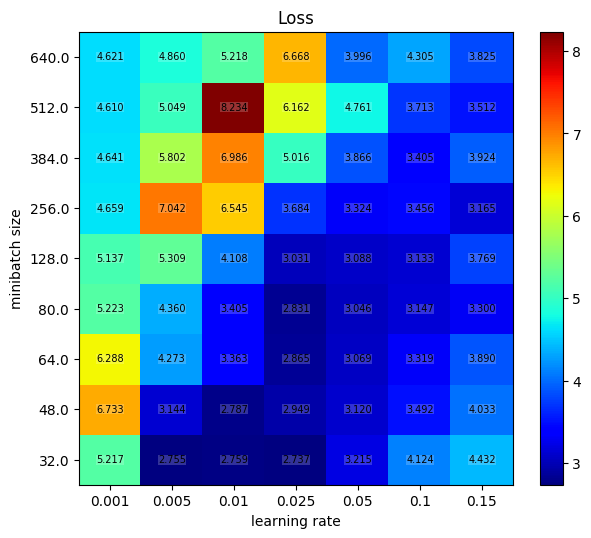

In [38]:
plotHeatMap(loss_T,"Loss","jet")

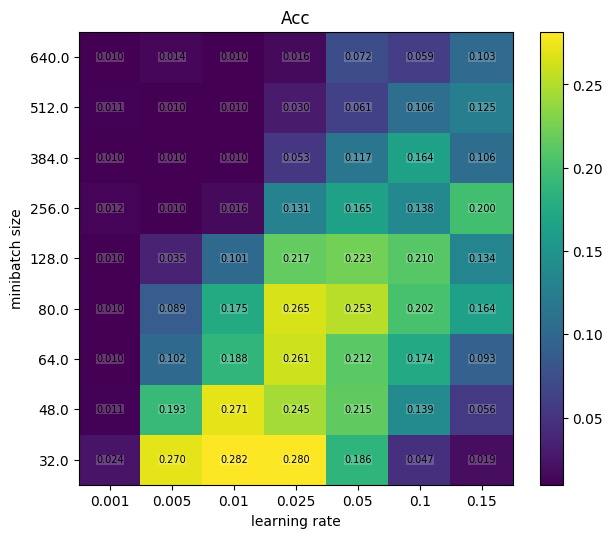

In [39]:
plotHeatMap(acc_T,"Acc")

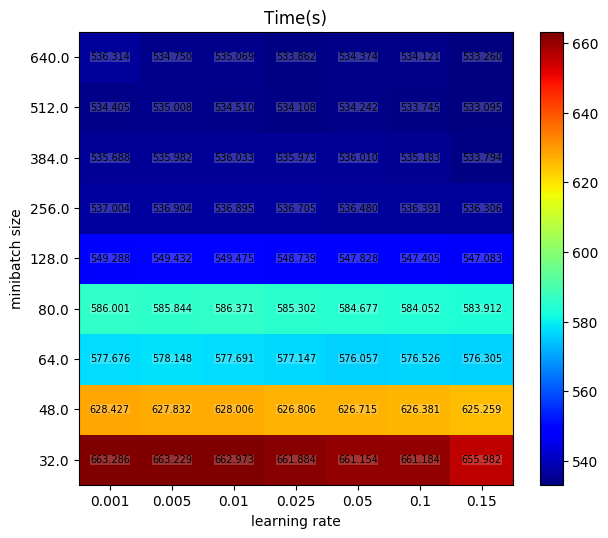

In [40]:
plotHeatMap(time_T,"Time(s)","jet")